<h1><center>Zastosowanie Informatyki W Medycynie</center></h1>
<h2><center>Zadanie 3</center></h2>
<h3><center>Piotr Wardęcki 234128</center><br/><center>Paweł Galewicz 234053</center><br/><center>Zbigniew Nowacki 234102</center><br/><center>Bartosz Jurczewski 234067</center></h3>
<h4><center>Rok akademicki 2020/21</center></h4>
<h4><center>Środa, 13:30</center></h4>

### 1. Wprowadzenie

W ramach zadania przygotowany został program, który pozwala na wybranie pliku w formacie DICOM, który następnie przetwarza i prezentuje w zrozumiałej dla człowieka formie. W folderze znajdują się przykładowe pliki, na których zaprezentowane zostało użycie rozwiązania.

### 2. Implementacja

Rozwiązanie zaimplementowane zostało z wykorzystaniem języka Python 3 oraz narzędzia Jupyter Notebook. Przygotowane zostały metody do wyboru pliku, analizy zawartych w nim metadanych oraz wyświetlenia znajdującego się w nim obrazu.

In [1]:
%gui qt
from PyQt5.QtWidgets import QFileDialog
from pydicom import filereader as reader, dataelem as elem
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def dicom_to_df(ds):
    ds.PixelData = 'Image above'
    output = []
    for raw_value in ds.values():
        value = elem.DataElement_from_raw(raw_value) if isinstance(raw_value,elem.RawDataElement) else raw_value
        tags = str(value)
        tags = tags[tags.find('(')+1 : tags.find(')')]
        output.append((value.name, value.value, tags))
    
    return pd.DataFrame(output, columns=['Name', 'Value', 'Tags'])

In [11]:
def get_dicom():
    dir = './'
    fname, ftype = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="DICOM files (*.dcm)")
    ds = reader.dcmread(fname)
    img = ds.pixel_array
    return dicom_to_df(ds), img

In [20]:
def show_img(img):
    fig = plt.figure()
    fig.patch.set_visible(False)
    fig.add_subplot(111)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.seismic)
    plt.show()

### 3. Wykorzystanie

W celu zaprezentowania rozwiązania pobrane zostały przykładowe pliki DICOM zawierające obrazy czaszki, z których wyczytać można informację, czy u pacjenta wystąpił krwotok śródczaszkowy, czyli krwawienie, które występuje wewnątrz czaszki. 

Dane pobrano z: 
https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/overview

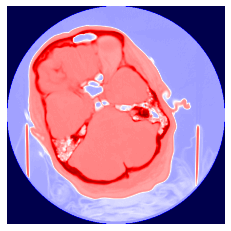

,Name,Value,Tags
0,SOP Instance UID,ID_000012eaf,"0008, 0018"
1,Modality,CT,"0008, 0060"
2,Patient ID,ID_f15c0eee,"0010, 0020"
3,Study Instance UID,ID_30ea2b02d4,"0020, 000d"
4,Series Instance UID,ID_0ab5820b2a,"0020, 000e"
5,Study ID,,"0020, 0010"
6,Image Position (Patient),"[-125.000000, -115.897980, 77.970825]","0020, 0032"
7,Image Orientation (Patient),"[1.000000, 0.000000, 0.000000, 0.000000, 0.927...","0020, 0037"
8,Samples per Pixel,1,"0028, 0002"
9,Photometric Interpretation,MONOCHROME2,"0028, 0004"


In [23]:
df, img = get_dicom()
show_img(img)
df

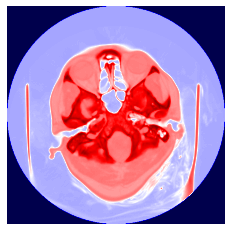

,Name,Value,Tags
0,SOP Instance UID,ID_000039fa0,"0008, 0018"
1,Modality,CT,"0008, 0060"
2,Patient ID,ID_eeaf99e7,"0010, 0020"
3,Study Instance UID,ID_134d398b61,"0020, 000d"
4,Series Instance UID,ID_5f8484c3e0,"0020, 000e"
5,Study ID,,"0020, 0010"
6,Image Position (Patient),"[-125.000000, -141.318451, 62.720940]","0020, 0032"
7,Image Orientation (Patient),"[1.000000, 0.000000, 0.000000, 0.000000, 0.968...","0020, 0037"
8,Samples per Pixel,1,"0028, 0002"
9,Photometric Interpretation,MONOCHROME2,"0028, 0004"


In [24]:
df, img = get_dicom()
show_img(img)
df

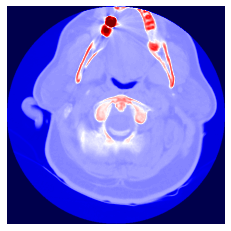

,Name,Value,Tags
0,SOP Instance UID,ID_00005679d,"0008, 0018"
1,Modality,CT,"0008, 0060"
2,Patient ID,ID_18f2d431,"0010, 0020"
3,Study Instance UID,ID_b5c26cda09,"0020, 000d"
4,Series Instance UID,ID_203cd6ec46,"0020, 000e"
5,Study ID,,"0020, 0010"
6,Image Position (Patient),"[-134.463, -110.785, -39.569]","0020, 0032"
7,Image Orientation (Patient),"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...","0020, 0037"
8,Samples per Pixel,1,"0028, 0002"
9,Photometric Interpretation,MONOCHROME2,"0028, 0004"


In [26]:
df, img = get_dicom()
show_img(img)
df